## 지역별 행복지수(평균) 분석

데이터: _Happiness Report 2016_ (datasets/2016.csv)  

numpy를 활용하여 배열 데이터를 다룹니다.  
행복지수를 지역(Region)별로 분류한 후 평균을 통해 비교합니다.   
<hr>

우선 csv 파일을 불러와 레이블과 데이터를 분류합니다. 

In [1]:
import numpy as np

dataset = np.loadtxt("datasets/2016.csv", delimiter=",", encoding="utf-8", dtype=np.str_)
label = dataset[0]
data = np.array(dataset[1:])

# 레이블 확인
print(*label, sep=", ")

Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual


출력 결과를 통해 1번 레이블이 지역(Region), 3번 레이블이 행복지수(Happiness Score)임을 확인합니다. 따라서 모든 1번 레이블(지역 정보)을 불러와 정렬합니다. 

In [2]:
COL_REGION = 1
COL_SCORE = 3

regions = set(data[:, COL_REGION])
regions = sorted(list(regions))

# 지역 정보
print(*regions, sep=", ")

Australia and New Zealand, Central and Eastern Europe, Eastern Asia, Latin America and Caribbean, Middle East and Northern Africa, North America, Southeastern Asia, Southern Asia, Sub-Saharan Africa, Western Europe


지역에 따라 행복지수를 리스트로 저장합니다. 그리고 행복지수를 실수(float64)로 변환합니다.  
결과: [ [ Australia and New Zealand ], [ Central and Eastern Europe ] ... ]

In [3]:
region_scores = list()

for region in regions:
    rows = np.where(data[:, COL_REGION] == region)
    scores = data[rows, COL_SCORE].astype(np.float64)
    region_scores.append(scores)

# 각 배열의 크기
sizes = map(np.shape, region_scores)
print("size:", *sizes)

size: (1, 2) (1, 29) (1, 6) (1, 24) (1, 19) (1, 2) (1, 9) (1, 7) (1, 38) (1, 21)


지역별 행복지수의 평균을 계산합니다. 

In [4]:
region_means = list(map(np.mean, region_scores))
print(*region_means, sep=", ")

7.323499999999999, 5.3706896551724155, 5.624166666666667, 6.10175, 5.386052631578948, 7.254, 5.338888888888889, 4.563285714285714, 4.1364210526315786, 6.685666666666667


막대 그래프를 이용해 결과를 보여줍니다.  

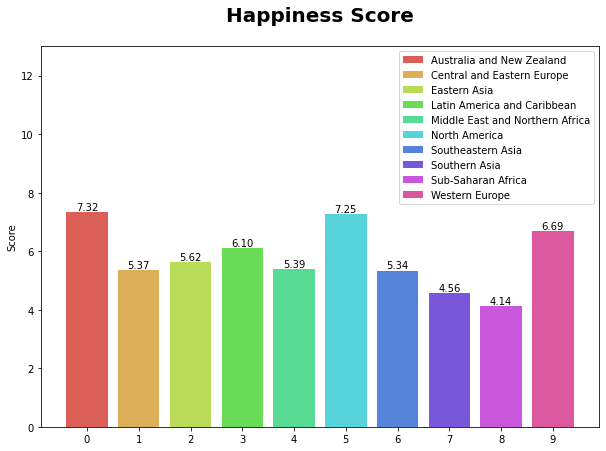

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

region_index = np.arange(len(regions)).astype(np.str_)
colors = sns.color_palette("hls", len(regions))
title_font = {
    "fontsize": 20,
    "fontweight": "bold"
}

colored_bars = ax.bar(region_index, region_means, color=colors)
ax.set_ylim([0, 13])
ax.set_ylabel("Score")
ax.set_title("Happiness Score", fontdict=title_font, pad=25)
ax.legend(handles=colored_bars, labels=regions)

for rect in colored_bars:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.text(x, y, f"{y:.2f}", ha="center", va="bottom")
    
plt.show()

분석한 데이터를 .npy 형식의 파일로 저장합니다. 

In [6]:
result = list(zip(regions, region_scores))
result = np.array(result, dtype=np.object_)
np.save("datasets/score_by_region_2016", result)

In [7]:
saved = np.load("datasets/score_by_region_2016.npy", allow_pickle=True)
print(saved)

[['Australia and New Zealand' array([[7.334, 7.313]])]
 ['Central and Eastern Europe'
  array([[6.596, 6.078, 5.987, 5.919, 5.897, 5.856, 5.835, 5.813, 5.802,
          5.768, 5.658, 5.56 , 5.528, 5.517, 5.488, 5.401, 5.291, 5.185,
          5.177, 5.163, 5.161, 5.145, 5.121, 4.996, 4.655, 4.36 , 4.324,
          4.252, 4.217]])                                               ]
 ['Eastern Asia' array([[6.379, 5.921, 5.835, 5.458, 5.245, 4.907]])]
 ['Latin America and Caribbean'
  array([[7.087, 7.039, 6.952, 6.778, 6.705, 6.701, 6.65 , 6.545, 6.481,
          6.324, 6.269, 6.168, 6.084, 6.068, 5.992, 5.976, 5.956, 5.822,
          5.743, 5.538, 5.51 , 5.155, 4.871, 4.028]])                   ]
 ['Middle East and Northern Africa'
  array([[7.267, 6.573, 6.379, 6.375, 6.355, 6.239, 6.218, 5.615, 5.389,
          5.303, 5.151, 5.129, 5.045, 4.813, 4.754, 4.575, 4.362, 3.724,
          3.069]])                                                      ]
 ['North America' array([[7.404, 7.104]])]
